<a href="https://colab.research.google.com/github/north-sound-peng/Business-Analytics-Project/blob/main/Predicting%20Patient%20how-Up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2: Predicting Patient Show-Up

### Background

You've been hired as the manager of SHMC, a medical center in Brazil. As part of its business model, SHMC usually employs doctors on demand, meaning that doctors are asked to come only when there are appointments. However, once a doctor has been asked to come, you must pay him or her regardless of whether the patient shows up or not. You want to use data on previous appointments to figure out whether you can predict which patients are going to show up, so that you can plan better how many doctors to call.

[The data can be downloaded at this link.](https://drive.google.com/uc?download=export&id=1iM0CSzfNckc565zwpb4VpHjEVLgckLPE)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Loading the data

**1. Load the data referenced by the path above into a pandas data frame. Print the total number of rows and columns, and show the first few rows in the dataset.**

In [ ]:
#load the data
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab_Notebooks/SHMC_NoShows.csv"

df = pd.read_csv(data_path)

#print the total number of rows and columns
print("Total number of rows: ", df.shape[0])
print("Total number of columns: ", df.shape[1])

#show the first few rows in the dataset
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total number of rows:  110527
Total number of columns:  14


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here's a brief summary of the features in the data:

1. PatientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or female.
4. ScheduledDay - The day someone called or registered the appointment.
6. AppointmentDay - The day of the actual appointment, when the patient has to visit the doctor.
7. Age = How old is the patient.
8. Neighborhood - Place where the patient lives.
9. Scholarship - Whether the patient receives financial help.
10. Hypertension - Whether the patient suffers from hypertension.
11. Diabetes - Whether the patient suffers from diabetes.
12. Alcoholism - Whether the patient suffers from alcoholism.
13. Handicap - Whether the patient is handicapped.
14. SMS_received - Whether 1 or more SMS messages were sent to the patient
15. No-show - Whether the patient missed the appointment.

### Exploratory Data Analysis

**2. Transform ScheduledDay and AppointmentDay into datetimes (Hint: Use pandas for this).**

In [ ]:
# transform ScheduledDay and AppointmentDay into datetimes
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

**3. If you take a look at both dates, you will see that ScheduledDay includes a specific time with the date, but AppointmentDay doesn't. In order to compare both fields more easily, apply "normalize" to ScheduledDay (i.e., keep only the dates). Hint: See the [normalize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.normalize.html) method.**

In [ ]:
#normalize ScheduledDay
df['ScheduledDay'] = df['ScheduledDay'].dt.normalize()

**4. Create a new feature called 'TimeInAdvance' which is the difference in days between ScheduledDay and AppointmentDay.  (you may need to apply `dt.days`  to a datetime object to make sure this is a numeric). What is the longest advance time that someone scheduled an appointment??**

In [ ]:
#create TimeInAdvance
df['TimeInAdvance'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

#print the longest advance time
print("The longest advance time that someone scheduled an appointment is: ", df['TimeInAdvance'].max(), "days")

The longest advance time that someone scheduled an appointment is:  179 days


**5. Explore the data set using EDA functions we have discussed in class.  Look at each feature.  Do any of them contain missing or weird values or outliers that concern you, given the feature descriptions above?  Comment on any weird values you see in any of the columns? Remove observations that contain any strange observations you have no explanation for, and report on how many rows were removed.**

In [ ]:
# Check for missing values
print(df.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighborhood      0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
TimeInAdvance     0
dtype: int64


The dataset contains a total of 110,527 entries, and there are no missing values in any of the columns.

In [ ]:
# Check for unique values and their counts in each column
for column in df.columns:
    print(f"\nColumn: {column}")
    print(df[column].value_counts())


Column: PatientId
PatientId
8.221460e+14    88
9.963767e+10    84
2.688610e+13    70
3.353480e+13    65
2.584240e+11    62
                ..
2.367500e+11     1
1.744680e+14     1
7.978390e+12     1
5.595420e+13     1
1.557660e+13     1
Name: count, Length: 61744, dtype: int64

Column: AppointmentID
AppointmentID
5642903    1
5692618    1
5687640    1
5740664    1
5740598    1
          ..
5718442    1
5426425    1
5424230    1
5720832    1
5629448    1
Name: count, Length: 110527, dtype: int64

Column: Gender
Gender
F    71840
M    38687
Name: count, dtype: int64

Column: ScheduledDay
ScheduledDay
2016-05-03 00:00:00+00:00    4238
2016-05-02 00:00:00+00:00    4216
2016-05-16 00:00:00+00:00    4120
2016-05-05 00:00:00+00:00    4095
2016-05-10 00:00:00+00:00    4024
                             ... 
2016-04-16 00:00:00+00:00       1
2016-01-28 00:00:00+00:00       1
2015-11-10 00:00:00+00:00       1
2016-03-19 00:00:00+00:00       1
2016-03-05 00:00:00+00:00       1
Name: count, Length

The "handicap" feature should only contain values of 0 or 1, making any value greater than 1 unusual. Additionally, the "age" column contains an abnormal value of -1, which is clearly incorrect.

In [ ]:
# Check for outliers in numerical features (Age, TimeInAdvance)
print("\nDescriptive statistics for Age:")
print(df['Age'].describe())

print("\nDescriptive statistics for TimeInAdvance:")
print(df['TimeInAdvance'].describe())


Descriptive statistics for Age:
count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Descriptive statistics for TimeInAdvance:
count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: TimeInAdvance, dtype: float64


Upon further inspection of the "age" column, the minimum value is -1, which is impossible. The maximum age value of 115 also seems questionable as it is significantly higher than the 75th percentile. In the "TimeInAdvance" column, the maximum value is 179 days, which is far from the 75th percentile value of 15 days. We will further investigate these values using a boxplot to assess their distribution.

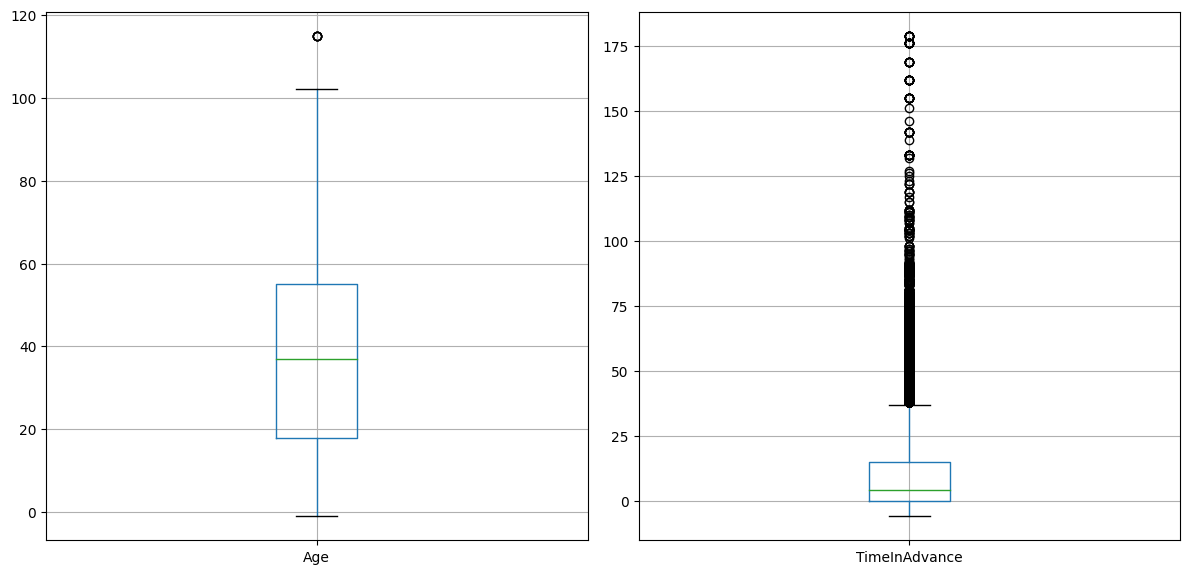

In [ ]:
#side-by-side boxplots - age and timeinadvance
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
df.boxplot(column='Age', ax=axes[0])
df.boxplot(column='TimeInAdvance', ax=axes[1])
plt.suptitle("")  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots, avoid overplotting

Although the value of 115 in age column seems to be an outlier according to age boxplot, it is not far from its upper bound. Therefore, it is not excluded from the dataset. Similarly, the extreme values in the "TimeInAdvance" column, while large, are not far enough from the upper bound to warrant exclusion.

In [ ]:
# Analyze Age column
print("\nUnique values and counts in Age:")
print(df['Age'].value_counts().sort_index())

# Analyze TimeInAdvance
print("\nUnique values and counts in TimeInAdvance:")
print(df['TimeInAdvance'].value_counts().sort_index())


Unique values and counts in Age:
Age
-1         1
 0      3539
 1      2273
 2      1618
 3      1513
        ... 
 98        6
 99        1
 100       4
 102       2
 115       5
Name: count, Length: 104, dtype: int64

Unique values and counts in TimeInAdvance:
TimeInAdvance
-6          1
-1          4
 0      38563
 1       5213
 2       6725
        ...  
 155       10
 162       11
 169        8
 176       16
 179       10
Name: count, Length: 131, dtype: int64


In the "TimeInAdvance" column, all negative values and excessively large values should be treated as outliers. Specifically, values like -6 and -1 are considered abnormal. We will define a boundary to properly categorize abnormal times in advance of an appointment.

In [ ]:
# Remove rows with negative Age
rows_before_age = df.shape[0]
df = df[df['Age'] >= 0]
rows_after_age = df.shape[0]
rows_removed_age = rows_before_age - rows_after_age
print(f"\nRemoved {rows_removed_age} rows with negative age.")

# Remove rows with negative or excessively large TimeInAdvance
df = df[df['TimeInAdvance'] >= 0]
rows_before_timeinadvance = df.shape[0]
df = df[df['TimeInAdvance'] <= 182]  # Assuming appointments scheduled more than half a year in advance are unusual
rows_after_timeinadvance = df.shape[0]
rows_removed_timeinadvance = rows_before_timeinadvance - rows_after_timeinadvance
print(f"\nRemoved {rows_removed_timeinadvance} rows with negative or excessively large TimeInAdvance.")

# Remove rows with strange Handicap values (i.e., Handicap > 1)
rows_before_handicap = df.shape[0]
df = df[df['Handicap'] <= 1]
rows_after_handicap = df.shape[0]
rows_removed_handicap = rows_before_handicap - rows_after_handicap
print(f"\nRemoved {rows_removed_handicap} rows with Handicap values greater than 1.")

# You can further investigate and remove outliers or strange values in other columns
# based on your understanding of the data and domain knowledge

print(f"\nTotal number of rows remaining after cleaning: {df.shape[0]}")


Removed 1 rows with negative age.

Removed 0 rows with negative or excessively large TimeInAdvance.

Removed 199 rows with Handicap values greater than 1.

Total number of rows remaining after cleaning: 110322


**6. Create a new column called "IsFemale" that is 1 if the patient is female and 0 otherwise. Also, drop the Gender column.**

In [ ]:
df['IsFemale'] = (df['Gender'] == 'F').astype(int)
df = df.drop('Gender', axis=1)

**7. Do the same for the No-show variable. It should be 1 if the person didn't show and 0 otherwise.**

In [ ]:
df['No-show'] = (df['No-show'] == 'Yes').astype(int)

**8. Now we explore the `Neighborhood` feature.  It is a categorical with many levels (as can be seen from `value_counts`).  To simplify the analysis we are going to create a new verison of `Neighborhood` by re-labelling any neighborhoods that appear LESS THAN 2000 times and them with Neighborhood="OTHER".  Show a table of value_counts of your *new* Neighborhood feature.**

In [ ]:
# Group by neighborhood and count occurrences
neighborhood_counts = df['Neighborhood'].value_counts()

# Identify neighborhoods with less than 2000 occurrences
neighborhoods_to_replace = neighborhood_counts[neighborhood_counts < 2000].index

# Replace neighborhoods with less than 2000 occurrences with "OTHER"
df['Neighborhood'] = df['Neighborhood'].replace(neighborhoods_to_replace, 'OTHER')

# Display value counts of the new Neighborhood feature
print(df['Neighborhood'].value_counts())

Neighborhood
OTHER                43792
JARDIM CAMBURI        7717
MARIA ORTIZ           5805
RESISTÊNCIA           4419
JARDIM DA PENHA       3872
ITARARÉ               3507
CENTRO                3330
TABUAZEIRO            3126
SANTA MARTHA          3113
JESUS DE NAZARETH     2853
BONFIM                2770
SANTO ANTÔNIO         2742
CARATOÍRA             2564
SANTO ANDRÉ           2562
JABOUR                2509
SÃO PEDRO             2433
NOVA PALESTINA        2261
ILHA DO PRÍNCIPE      2259
ANDORINHAS            2255
DA PENHA              2210
ROMÃO                 2205
GURIGICA              2018
Name: count, dtype: int64


**9. Create dummy variables for your new Neighborhood feature, add the dummies to your data frame, and then drop the original Neighborhood column from the data frame. Print a `head()` of your new data frame.**

In [ ]:
# Create dummy variables for Neighborhood
neighborhood_dummies = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first=True)
df = pd.concat([df, neighborhood_dummies], axis=1)

# Drop the original Neighborhood column
df = df.drop('Neighborhood', axis=1)

print(df.head())

      PatientId  AppointmentID              ScheduledDay  \
0  2.987250e+13        5642903 2016-04-29 00:00:00+00:00   
1  5.589980e+14        5642503 2016-04-29 00:00:00+00:00   
2  4.262960e+12        5642549 2016-04-29 00:00:00+00:00   
3  8.679510e+11        5642828 2016-04-29 00:00:00+00:00   
4  8.841190e+12        5642494 2016-04-29 00:00:00+00:00   

             AppointmentDay  Age  Scholarship  Hypertension  Diabetes  \
0 2016-04-29 00:00:00+00:00   62            0             1         0   
1 2016-04-29 00:00:00+00:00   56            0             0         0   
2 2016-04-29 00:00:00+00:00   62            0             0         0   
3 2016-04-29 00:00:00+00:00    8            0             0         0   
4 2016-04-29 00:00:00+00:00   56            0             1         1   

   Alcoholism  Handicap  ...  Neighborhood_MARIA ORTIZ  \
0           0         0  ...                     False   
1           0         0  ...                     False   
2           0         0  .

**10. There are many patients that have made more than one appointment. This data set contains multiple observations per person, so we can use their past appointments as features in predicting whether the current appointment will be a no-show.**

**For example, the fact that a patient has failed to show up in the past may be predictive of the patient not showing up in the future. We want to create a variable that calculates the number of no_shows BEFORE the current appointment.**

**Create a new column called "PreviousNoShows" that for each appointment includes the number of *previous* appointments to which the patient did not show. For example, if the person did not show to the first meeting, PreviousNoShows should be 0 for the first appointment and 1 for the second one (if there is any). (We have provided sample code for this part below, but take a look at it to see if it makes sense to you).**

**Now, create a plot which shows the relationship between PreviousNoShows and percent No-Shows for the current appointment.  Does there seem to be a relationship?**

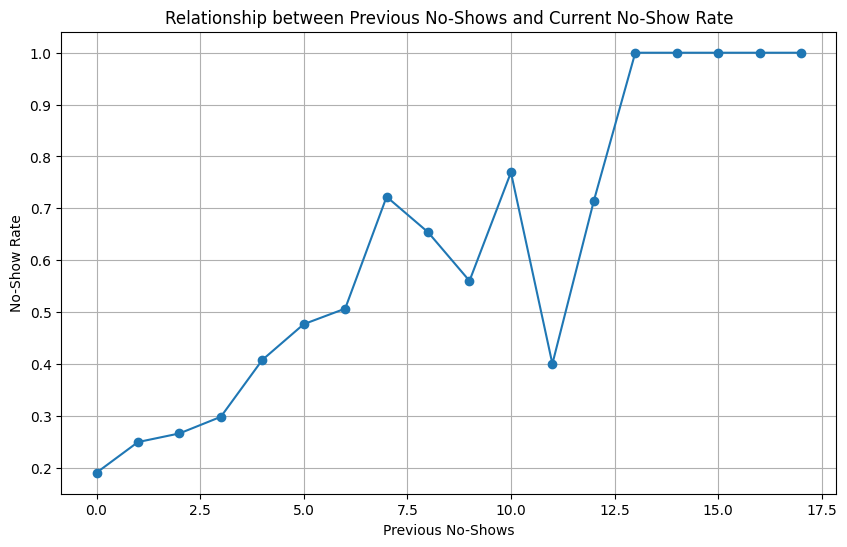

In [ ]:
#Create a new column called "PreviousNoShows" that for each appointment includes the number of previous appointments to which the patient did not show.
df = df.sort_values(['PatientId', 'ScheduledDay'])
df['PreviousNoShows'] = df.groupby(['PatientId'])['No-show'].cumsum()
df['PreviousNoShows'] = df.groupby('PatientId')['PreviousNoShows'].shift(fill_value=0)
df['PreviousNoShows'] = df['PreviousNoShows'].astype(int)

#Create a plot which shows the relationship between PreviousNoShows and percent No-Shows for the current appointment
import matplotlib.pyplot as plt

no_show_rates = df.groupby('PreviousNoShows')['No-show'].mean()

plt.figure(figsize=(10, 6))
plt.plot(no_show_rates.index, no_show_rates.values, marker='o')
plt.xlabel('Previous No-Shows')
plt.ylabel('No-Show Rate')
plt.title('Relationship between Previous No-Shows and Current No-Show Rate')
plt.grid(True)
plt.show()

There appears to be a relationship between the number of previous no-shows and the current no-show rate based on the graph.

As the number of previous no-shows increases, the no-show rate generally rises. Initially, with 0 to about 5 previous no-shows, the no-show rate increases gradually. After 5 previous no-shows, the trend becomes more variable but still generally upward, with notable spikes at around 7.5 and 12.5 previous no-shows, where the no-show rate reaches its peak (close to or at 100%).



### Predictive modeling using Trees

**11. Let's drop the columns we won't be needing. Drop PatientId, AppointmentID, ScheduledDay, AppointmentDay.**



In [ ]:
df = df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1)


**12. Build a model to predict No-Show using a DecisionTreeClassifier. First, split the data into training and test (80/20) - using `random_state=99`.  Using max_depth=3, fit the DecisionTreeClassifier to the training set and report the accuracy on the test set.**


In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score


In [ ]:
# Split data into training and testing sets
X = df.drop('No-show', axis=1)
y = df['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# fit the model on the training set
decision_tree = DecisionTreeClassifier(max_depth=3, criterion="entropy")
decision_tree.fit(X_train, y_train)

# apply the model to the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model's accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy on the test set:",round(accuracy,4))

Accuracy on the test set: 0.7954


**13: Plot the tree.  What are the rules for the path that has the highest probability of no-show?**

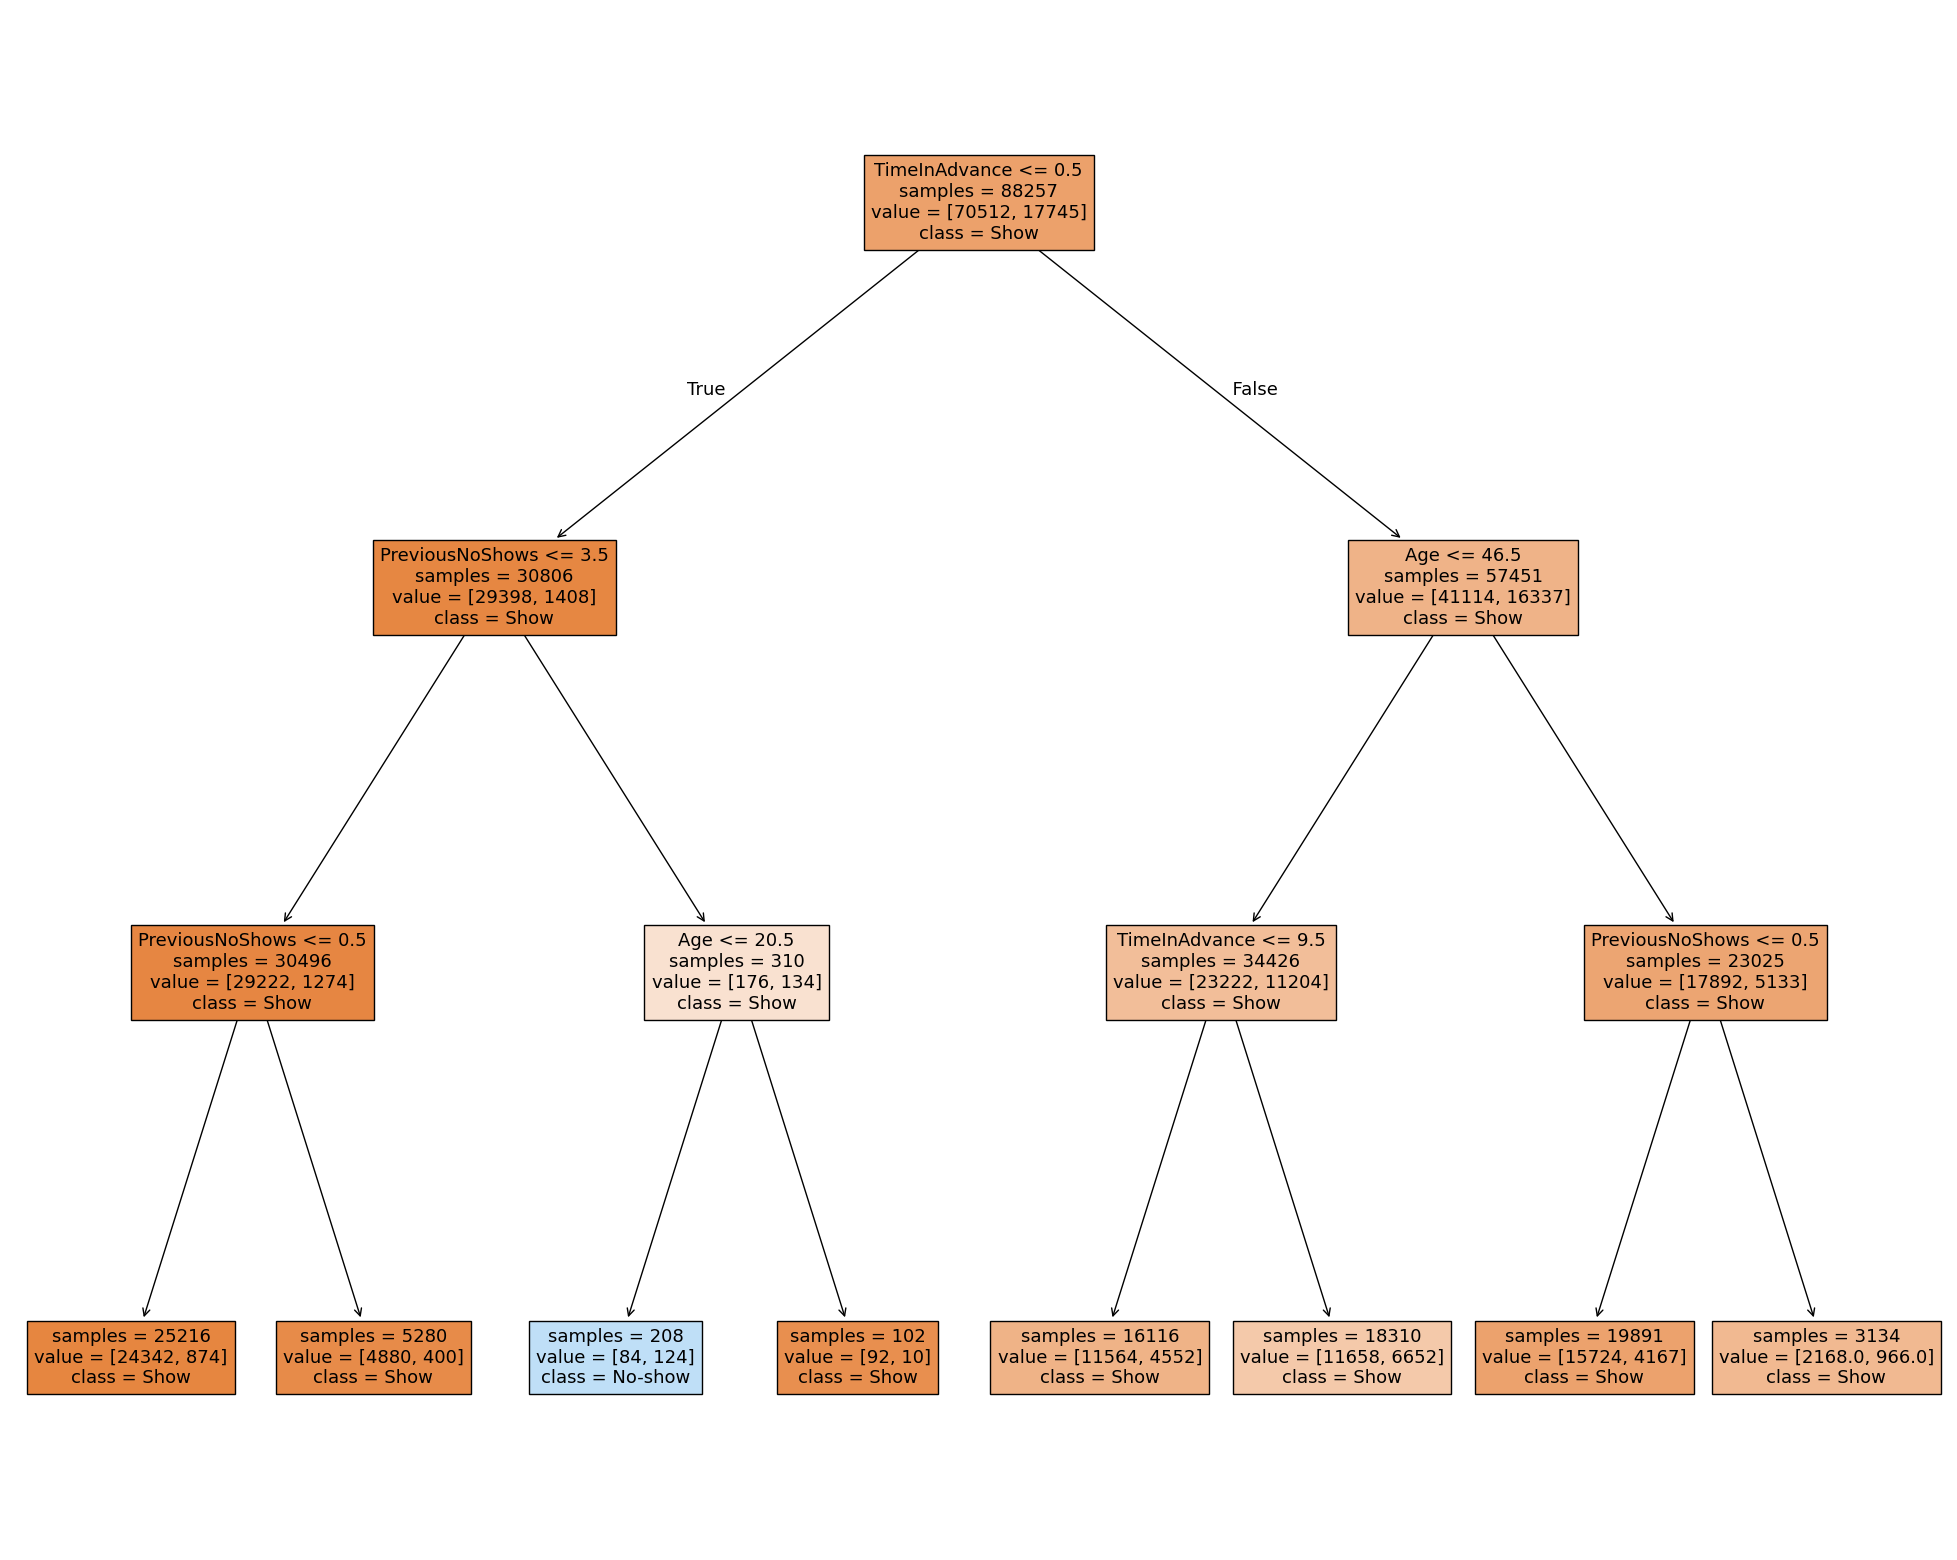

In [ ]:
plt.figure(figsize=(25,20))
plot_tree(decision_tree, feature_names=X.columns, class_names=['Show', 'No-show'], filled=True, impurity=False)
plt.show()

The highest probability of no-show is indicated by the blue area in the graph, which highlights a pattern: patients who booked their appointment less than half a day in advance, have a no-show frequency greater than 3.5, and are younger than 20.5 years old show the highest likelihood of not attending.

**14. Now we will calculate the optimal tree depth.**  
- Create a for-loop that cycles over all `max_depth` values between 2 and 20
- in each iteration fit the model to the training set and calculate the accuracy on the test set
- print out the accuracy score at each iteration
- report on the optimal max_depth value

In [ ]:
depth_vals = range(2,21)
max_accuracy = 0
max_depth = 0

for i in depth_vals:
  depth = i
  decision_tree = DecisionTreeClassifier(max_depth=depth, criterion="entropy")
  decision_tree.fit(X_train, y_train)

  y_pred = decision_tree.predict(X_test)

  accuracy = metrics.accuracy_score(y_pred, y_test)

  print("max_depth=",i,"Accuracy on the test set:",round(accuracy,4))

  if accuracy > max_accuracy:
      max_accuracy = accuracy
      max_depth = depth

print("The optimal max_depth value is", max_depth)

max_depth= 2 Accuracy on the test set: 0.7948
max_depth= 3 Accuracy on the test set: 0.7954
max_depth= 4 Accuracy on the test set: 0.7952
max_depth= 5 Accuracy on the test set: 0.7985
max_depth= 6 Accuracy on the test set: 0.7977
max_depth= 7 Accuracy on the test set: 0.7982
max_depth= 8 Accuracy on the test set: 0.7988
max_depth= 9 Accuracy on the test set: 0.7985
max_depth= 10 Accuracy on the test set: 0.7967
max_depth= 11 Accuracy on the test set: 0.7963
max_depth= 12 Accuracy on the test set: 0.7946
max_depth= 13 Accuracy on the test set: 0.7931
max_depth= 14 Accuracy on the test set: 0.7931
max_depth= 15 Accuracy on the test set: 0.79
max_depth= 16 Accuracy on the test set: 0.7878
max_depth= 17 Accuracy on the test set: 0.787
max_depth= 18 Accuracy on the test set: 0.785
max_depth= 19 Accuracy on the test set: 0.7835
max_depth= 20 Accuracy on the test set: 0.7811
The optimal max_depth value is 8


**15.  Fit the tree model (again) using the optimal depth and call this `final_model`.  Create the 2x2 confusion matrix using the predictions on the test set, vs the true values of the test set (make sure your confusion matrix is labelled). Calculate precision and recall (either directly from the 2x2 matrix, or by using the functions `precision_score` and `recall_score`)**

In [ ]:
# fit the model on the training set
final_model = DecisionTreeClassifier(max_depth=8, criterion="entropy")
final_model.fit(X_train, y_train)

# apply the model to the test set
y_pred_final = final_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)

# Confusion matrix
conf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_final, labels=[1,0]).T)
conf_matrix.columns=['Actual1', 'Actual0']
conf_matrix.index=['Pred1', 'Pred0']
print(conf_matrix)

# Precision and recall
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)

print("Precision:", round(precision,3))
print("Recall:", round(recall,3))

       Actual1  Actual0
Pred1      259      170
Pred0     4269    17367
Precision: 0.604
Recall: 0.057


**16. Calculate the feature importance values for the features in `final_model`.  Comment on what the most important features are in estimating no-shows (and what isn't).  Are you surprised at what was and what was not important?  Comment on how you might you deal with this knowledge in making your office more efficient.**

In [ ]:
# Calculate feature importances
importance = final_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

#the most important features
print("\n The most important features are: ", feature_importance_df['Feature'].head(4).values)
#the least important features
print("\n The least important features are: ", feature_importance_df['Feature'].tail(4).values)

                           Feature  Importance
7                    TimeInAdvance    0.722034
0                              Age    0.115946
30                 PreviousNoShows    0.086519
6                     SMS_received    0.015697
8                         IsFemale    0.009318
13           Neighborhood_GURIGICA    0.006194
4                       Alcoholism    0.004415
1                      Scholarship    0.003624
22              Neighborhood_OTHER    0.003366
19  Neighborhood_JESUS DE NAZARETH    0.003333
15            Neighborhood_ITARARÉ    0.002788
12           Neighborhood_DA PENHA    0.002545
27      Neighborhood_SANTO ANTÔNIO    0.002464
25       Neighborhood_SANTA MARTHA    0.002457
28          Neighborhood_SÃO PEDRO    0.002192
2                     Hypertension    0.001992
20        Neighborhood_MARIA ORTIZ    0.001939
18    Neighborhood_JARDIM DA PENHA    0.001727
11             Neighborhood_CENTRO    0.001691
5                         Handicap    0.001554
23        Nei

# Most Important Features:
**TimeInAdvance (0.72):** The amount of time between booking the appointment and the appointment date is by far the most important feature, making up over 72% of the model’s importance. This suggests that patients who book appointments well in advance are much more likely to miss them, possibly because the long wait time may make them forget, lose interest, or face changing circumstances.

**Age (0.12):** Age also plays a significant role, though much less so than the time in advance. It could indicate that either very young or older patients may have different patterns when it comes to attending appointments (e.g., younger patients might have more unpredictable schedules, while older patients may struggle with mobility).

**PreviousNoShows (0.086):** This is expected to be an important feature because if a patient has missed previous appointments, they are more likely to miss again. While it ranks third in importance, it's still quite critical.

**SMS_received (0.016): **Whether or not a patient received an SMS reminder has some importance, indicating that reminders have a measurable but not overwhelming impact on reducing no-shows.

# Least Important Features:
**Neighborhood-related features:**  all neighborhood features have very low importance, many of them registering values close to 0. This suggests that geographic location does not significantly affect whether or not a patient shows up for an appointment.

**Other demographic and health-related factors:** Factors like Diabetes, Hypertension, Alcoholism, and Handicap also have minimal importance. This suggests that while health-related issues might impact the need for an appointment, they do not strongly influence whether someone will show up.


# Surprising Findings:
We might have expected neighborhoods with better or worse access to transportation or clinics to impact no-show rates, but that doesn't seem to be the case. This implies that geography plays little role in patient attendance.
Meanwhile, features such as Hypertension, Diabetes, and Alcoholism were not important. One might expect that patients with serious conditions would be more consistent in attending their appointments, but these conditions do not seem to be significant predictors.
# Not Surprising Findings:
It's intuitive that the more time between booking and the actual appointment, the higher the risk of a no-show. The fact that a patient's history with missing appointments is a good predictor is expected since past behavior is often an indicator of future behavior.
# How to Make Your Office More Efficient:
Given that TimeInAdvance is the most important factor, office could consider adjusting how far in advance appointments are booked. For high-risk no-show groups (e.g., patients with long lead times or those with previous no-shows), we can take several action such as:
1. Limit how far in advance they can book.
2. Implement reminder systems tailored to them (e.g., more frequent reminders closer to the appointment date).
3. Possibly overbook or have a waitlist system for slots where no-shows are more likely.
4. Focus on effective interventions: Since SMS reminders are important but not overwhelmingly so, consider exploring other reminder methods (e.g., phone calls, emails) to see if they further reduce no-show rates. We can also optimize the timing of these reminders to ensure they are more effective.


### **Extra-Credit (2 points).**

**The precision and recall above were calculated using a threshold of 0.5 (this is the default in the tree fitting function).  As we discussed in class, changing the threshold will have an effect on precision and recall.  Change the threshold of labelling a No-show to 0.7, and then to 0.3, and re-calcuate precision and recall each time.  Comment on the change in P&R between the two thresholds. Also, calculate the F1 value at all three thresholds and use that to pick the "best" one.**

In [ ]:
from sklearn.metrics import f1_score

# Predict probabilities for the test set
y_prob = final_model.predict_proba(X_test)[:, 1]

# Function to calculate metrics at a given threshold
def evaluate_at_threshold(threshold):
    y_pred_threshold = (y_prob >= threshold).astype(int)

    # Calculate precision, recall, and F1
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)

    # Print confusion matrix and metrics
    conf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_threshold, labels=[1,0]).T)
    conf_matrix.columns=['Actual1', 'Actual0']
    conf_matrix.index=['Pred1', 'Pred0']
    print(f"Confusion Matrix at threshold {threshold}:\n", conf_matrix)

    print(f"Precision: {round(precision, 3)}, Recall: {round(recall, 3)}, F1: {round(f1, 3)}\n")

    return precision, recall, f1

# Calculate metrics at different thresholds
results = []
thresholds = [0.3, 0.5, 0.7]

for threshold in thresholds:
    precision, recall, f1 = evaluate_at_threshold(threshold)
    results.append((threshold, precision, recall, f1))

# Choosing the best threshold based on F1-score
best_threshold = max(results, key=lambda x: x[3])[0]
print(f"The best threshold based on F1-score is: {best_threshold}")

Confusion Matrix at threshold 0.3:
        Actual1  Actual0
Pred1     2496     4327
Pred0     2032    13210
Precision: 0.366, Recall: 0.551, F1: 0.44

Confusion Matrix at threshold 0.5:
        Actual1  Actual0
Pred1      260      171
Pred0     4268    17366
Precision: 0.603, Recall: 0.057, F1: 0.105

Confusion Matrix at threshold 0.7:
        Actual1  Actual0
Pred1       75       28
Pred0     4453    17509
Precision: 0.728, Recall: 0.017, F1: 0.032

The best threshold based on F1-score is: 0.3


# Change in P&R between the two threshold:
**At 0.3:** The model has a relatively balanced trade-off between precision and recall, but both metrics are somewhat moderate. The higher recall (0.551) shows the model is better at catching most No-shows, but the lower precision (0.366) indicates many false positives.

**At 0.5:** Precision improves (0.603), but recall drops dramatically (0.057). The model is more precise in its No-show predictions but at the cost of missing the vast majority of true No-shows.

**At 0.7: **The model is highly precise (0.728), meaning it makes very few incorrect No-show predictions, but its recall drops to 0.017. This indicates that it's identifying almost none of the actual No-shows.

# Best Threshold Based on F1:
Based on the F1 scores:

*   At 0.3: F1 = 0.44
*   At 0.5: F1 = 0.105
*   At 0.7: F1 = 0.032

Threshold 0.3 has the highest F1-score, making it the "best" threshold among the three. At this threshold, the model achieves a better balance between precision and recall than at the other thresholds, making it more effective at predicting No-shows overall.